In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Loading and Inspection

In [3]:
df = pd.read_csv(r'Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.shape

(128976, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

## Data Cleaning

In [7]:
#drop unrelated blank columns
df.drop(['New','PendingS'],axis=1,inplace=True) #axis=1 means column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [10]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [11]:
#drop null values
df.dropna(inplace=True)

In [12]:
df.shape

(37514, 19)

In [15]:
#change the ship postal code and date datatype
df['ship-postal-code']=df['ship-postal-code'].astype('int')
df['Date']=pd.to_datetime(df['Date'])

C:\Users\srina\AppData\Local\Temp\ipykernel_1204\2472609624.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [18]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [23]:
#rename the columns
df.rename(columns ={'Qty':'Quantity'},inplace=True)

In [24]:
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [25]:
df.describe(include='all')

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
count,37514.000000,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514.000000,37514,37514.000000,37514,37514,37514.000000,37514,37514,37514
unique,NaN,34664,NaN,11,1,1,1,8,11,3,NaN,1,NaN,4698,58,NaN,1,2,1
top,NaN,171-5057375-2831560,NaN,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,NaN,INR,NaN,BENGALURU,MAHARASHTRA,NaN,IN,False,Easy Ship
freq,NaN,12,NaN,28741,37514,37514,37514,14062,6806,31859,NaN,37514,NaN,2839,6236,NaN,37514,37228,37514
mean,60953.809858,NaN,2022-05-11 07:56:47.303939840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.867383,NaN,646.553960,NaN,NaN,463291.552754,NaN,NaN,NaN
min,0.000000,NaN,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,110001.000000,NaN,NaN,NaN
25%,27235.250000,NaN,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,458.000000,NaN,NaN,370465.000000,NaN,NaN,NaN
50%,63470.500000,NaN,2022-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,629.000000,NaN,NaN,500019.000000,NaN,NaN,NaN
75%,91790.750000,NaN,2022-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,771.000000,NaN,NaN,600042.000000,NaN,NaN,NaN
max,128891.000000,NaN,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5495.000000,NaN,NaN,989898.000000,NaN,NaN,NaN


In [27]:
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


## Exploratory Data Analysis

### Size

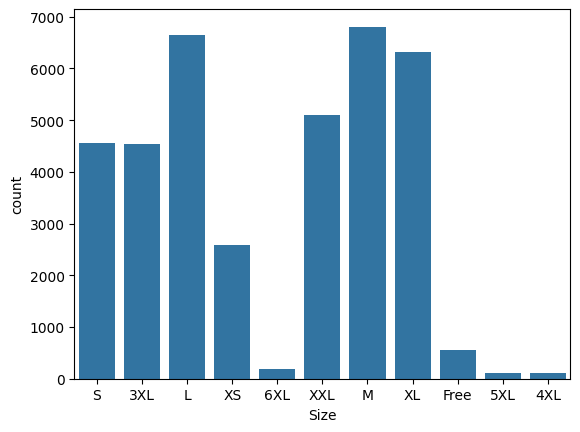

In [29]:
ax = sns.countplot(x='Size',data=df)

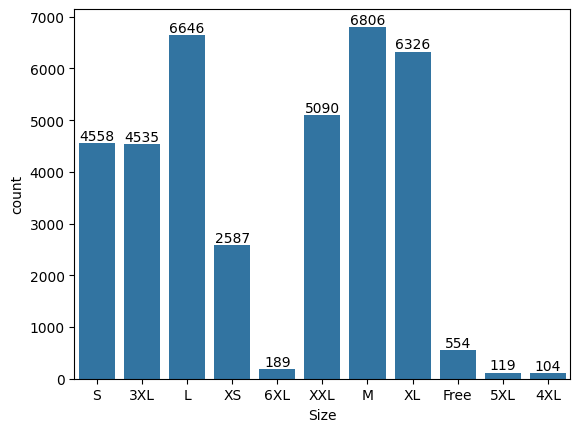

In [30]:
ax = sns.countplot(x='Size',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

* From observing above graphs we can say that most people have purchased M sized products

### Group BY

In [33]:
Quantity = df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
Quantity

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


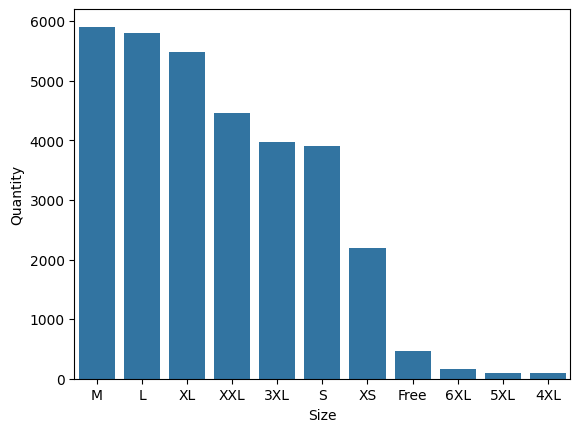

In [35]:
ax = sns.barplot(x='Size',y='Quantity',data=Quantity)

* From above Graph we can see that most number of quantity ordered are M-Sized products.

### Courier Status

In [36]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship


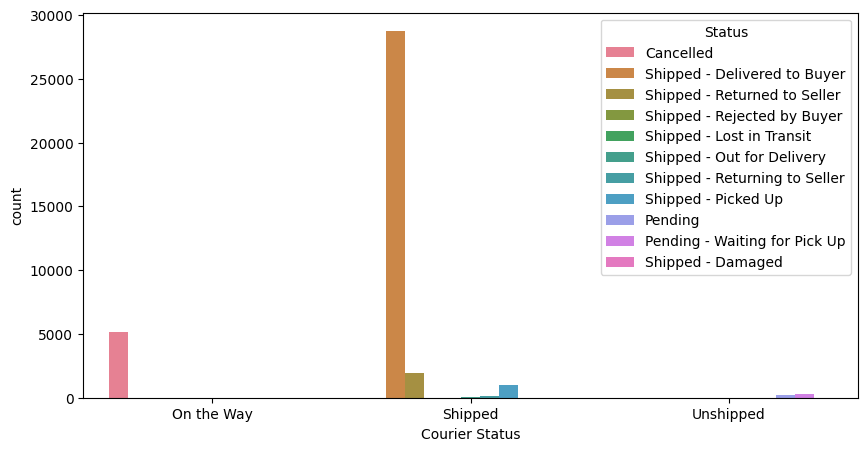

In [40]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Courier Status',data=df,hue='Status')
plt.show()

* From above Graph we can see that majority of the orders are shipped through courier

<Axes: >

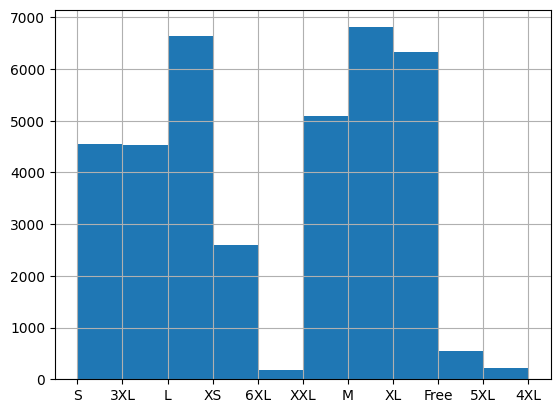

In [42]:
df['Size'].hist()

## Category Distribution

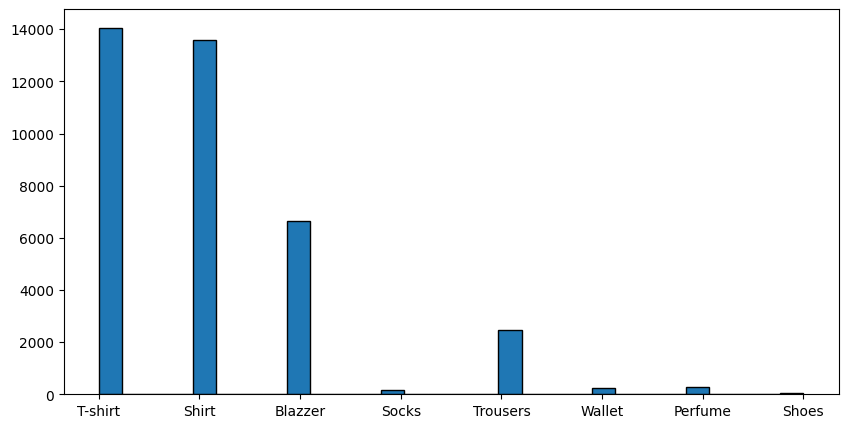

In [44]:
#convert category to string 
df['Category']=df['Category'].astype(str)
column_data = df['Category']

plt.figure(figsize=(10,5))
plt.hist(column_data,bins=30,edgecolor='Black')  #bins---> distance btw each block
plt.show()

* From observing above graph we can see that T-Shirts are the most sold product Category.

## B2B Analysis

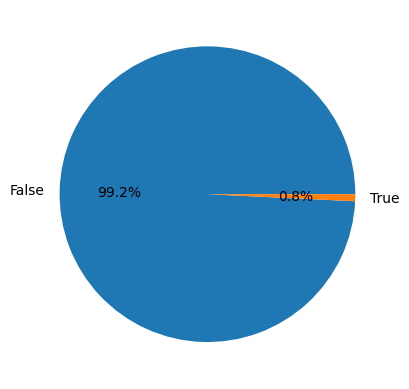

In [45]:
#check B2B data
B2B_check = df['B2B'].value_counts()

plt.pie(B2B_check,labels=B2B_check.index,autopct='%1.1f%%')
plt.show()

* From observing above chart we can say that majority i.e 99.2% buyers are retailers and only 0.8% are B2B buyers.

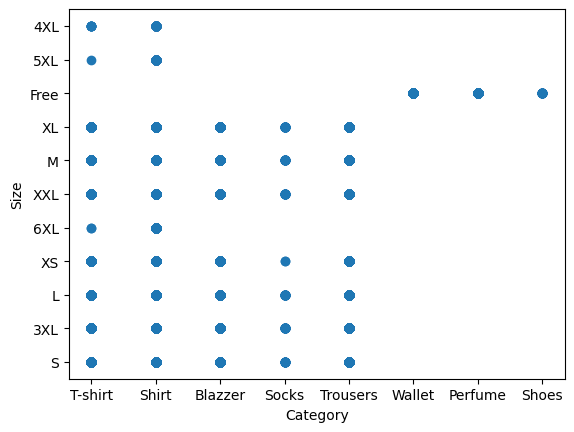

In [46]:
x_data = df['Category']
y_data=df['Size']

plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

## State-Wise Distribution

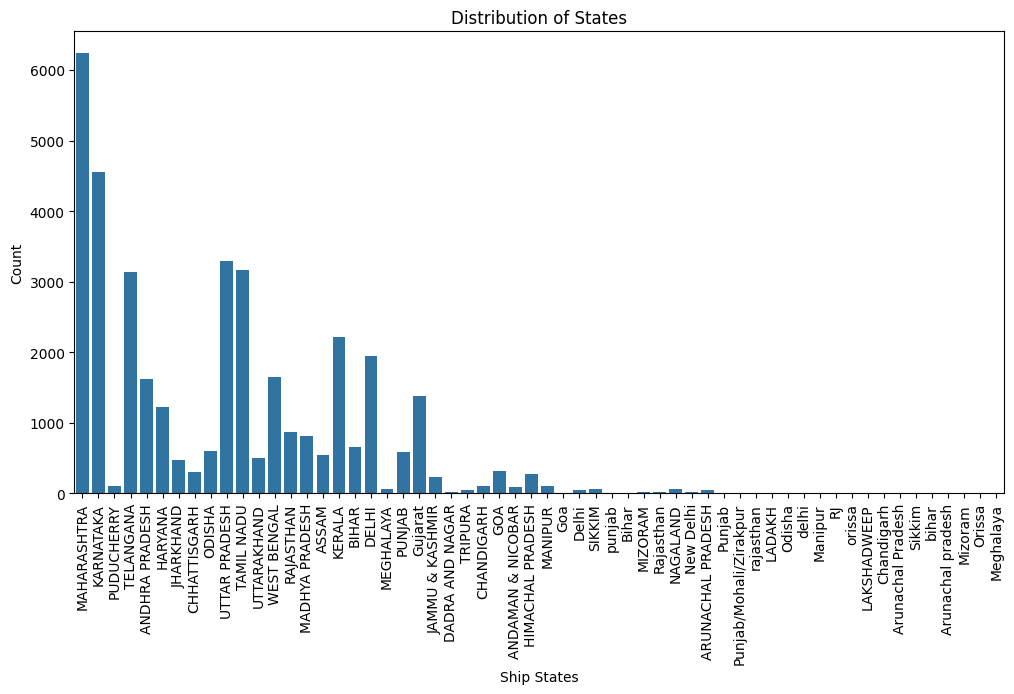

In [49]:
#Count of cities by states

plt.figure(figsize=(12,6))
sns.countplot(data=df,x='ship-state')
plt.xlabel('Ship States')
plt.ylabel('Count')
plt.title('Distribution of States')
plt.xticks(rotation=90)
plt.show()

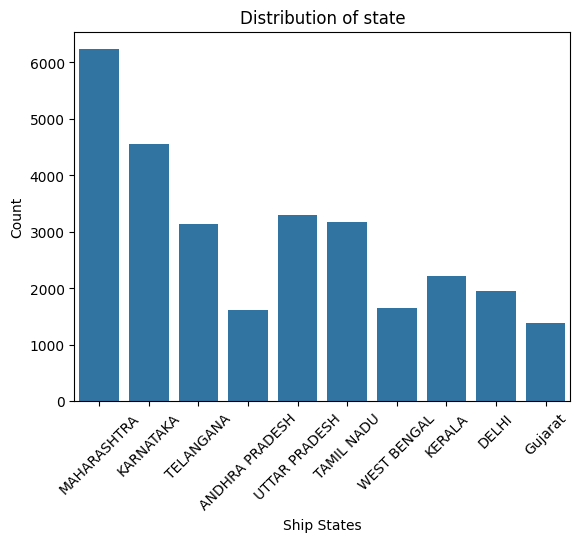

In [51]:
#top 10 States
top10_states = df['ship-state'].value_counts().head(10)

sns.countplot(data=df[df['ship-state'].isin(top10_states.index)],x='ship-state')
plt.xlabel('Ship States')
plt.ylabel('Count')
plt.title('Distribution of state')
plt.xticks(rotation=45)
plt.show()

* From above graph u can see that most of the buyers are from Maharastra.

## Conclusion

* The data analysis reveals that the business has
* A significant customer base in Maharashtra state
* Mainly serves retailers
* Fullfils orders through Amazon
* Experiences high demand for T-shirts with M-size as the preferred choice among buyers. 